# Q1


In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,10)

# I'm assuming I can't use pandas here becuase that's what I would usually use
# Only using matplotlib for visualisation

Preprocessing:

- Defined normalisation and filtering functions
- Load data into dict of np arrays (would normally use pandas for this kind of task)
- Cast numerical data to a float type
- Cast date data to date type
- Filter array by finding indices to keep for each variable and looping through the dict for all values

In [47]:
def norm(x):
    '''Normalisation function using standard score.'''
    # Decided against using normalisation as I was just fitting a simple linear regression model
    # More complex analysis could utilise normalisation including neural methods
    return (x - np.mean(x)) / np.std(x)

def filter_upper_vars(x, no_std=3):
    '''Filter numpy array.
    
    Returns indices to keep for a given array.'''
    # Only filter upper for the purpose of this assignment
#     lower_bound = np.mean(x) - no_std * np.std(x)
    upper_bound = np.mean(x) + no_std * np.std(x)
    return np.where((x < upper_bound))[0]

### Preprocessing ###

# Load in data
avocado_data = {}
for i in np.genfromtxt('avocado.csv', delimiter=',', dtype='str').T:
    avocado_data[i[0]] = i[1:]

# Cast numeric data to floats and normalise
numerical_data = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
for i in numerical_data:
    avocado_data[i] = avocado_data[i].astype(float)
    
# Convert date to np.datetime64
avocado_data['Date'] = avocado_data['Date'].astype(np.datetime64)

# Initial analysis concludes a number of outliers
for i in numerical_data:
    to_filter = avocado_data[i]
    # Remove all outliers that are 3*std above mean
    filter_indices = filter_upper_vars(to_filter, no_std=3)
    
    for j in numerical_data:
        avocado_data[j] = avocado_data[j][filter_indices]

# print(avocado_data)

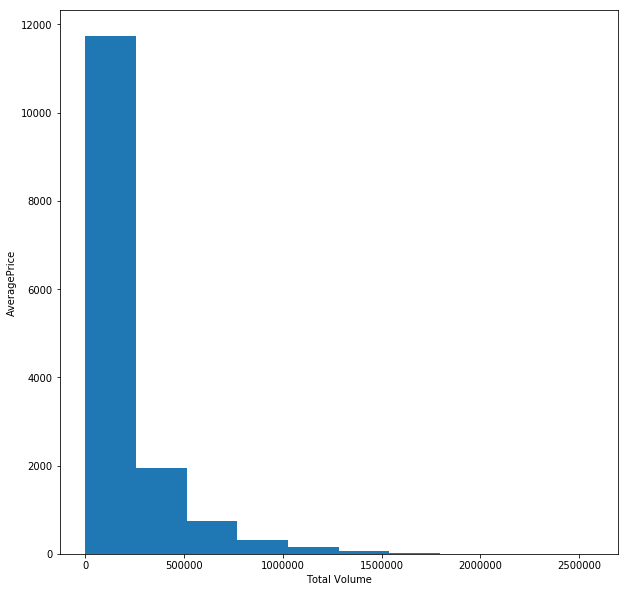

In [55]:
# Introductory plotting
# Initial plotting indicated a number of outliers
x_label = 'Total Volume'
y_label = 'AveragePrice'

plt.hist(avocado_data[x_label])
plt.ylabel(y_label)
_ = plt.xlabel(x_label)

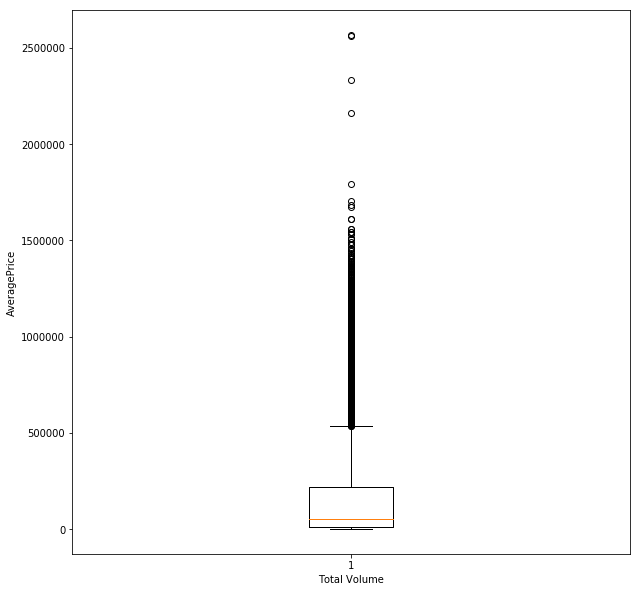

In [57]:
plt.boxplot(avocado_data['Total Volume'])
plt.xlabel(x_label)
_ = plt.ylabel(y_label)

In [58]:
# Define a simple linear regression model

class LinearRegression:
    '''Very simple linear regression model.'''
    
    def __init__(self, y):
        '''Initialise model with y values.
        
        Args:
            y: list-like, y values to fit model to
        '''
        self.y = y
        
    def fit(self, x):
        '''Fit model to given input.
        
        Args:
            x: list-like, x values to fit model to
        '''
        self.m = self.grad(x)
        self.b = self.inter(x)
    
    def grad(self, x):
        '''Calculate gradient of regression.
        
        Args:
            x: list-like, x values to fit model to
        '''
        return (len(x) * np.sum(x*self.y) - np.sum(x) * np.sum(self.y)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
        
    def inter(self, x):
        '''Calculate y-intercept of regression.
        
        Args:
            x: list-like, x values to fit model to
        '''
        return (np.sum(self.y) - self.m * np.sum(x)) / len(x)
    
    def predict(self, x):
        '''Predict new x values.
        
        Args:
            x: list-like, x values to predict y values for
        '''
        return self.m * x + self.b

var m b
AveragePrice 1.0 0.0
Total Volume -7.344429727858256e-07 1.5735203644551499
4046 -1.3860808093611197e-06 1.5251559053076045
4225 -9.68812568913046e-07 1.5156542722016066
4770 -1.4690665249404576e-05 1.5000276112413284
Total Bags -2.947149668321348e-06 1.58650987488517
Small Bags -3.244609568320694e-06 1.5660440531312083
Large Bags -6.322394702033124e-06 1.518726172467617
XLarge Bags -8.55132867500739e-05 1.475405378818953


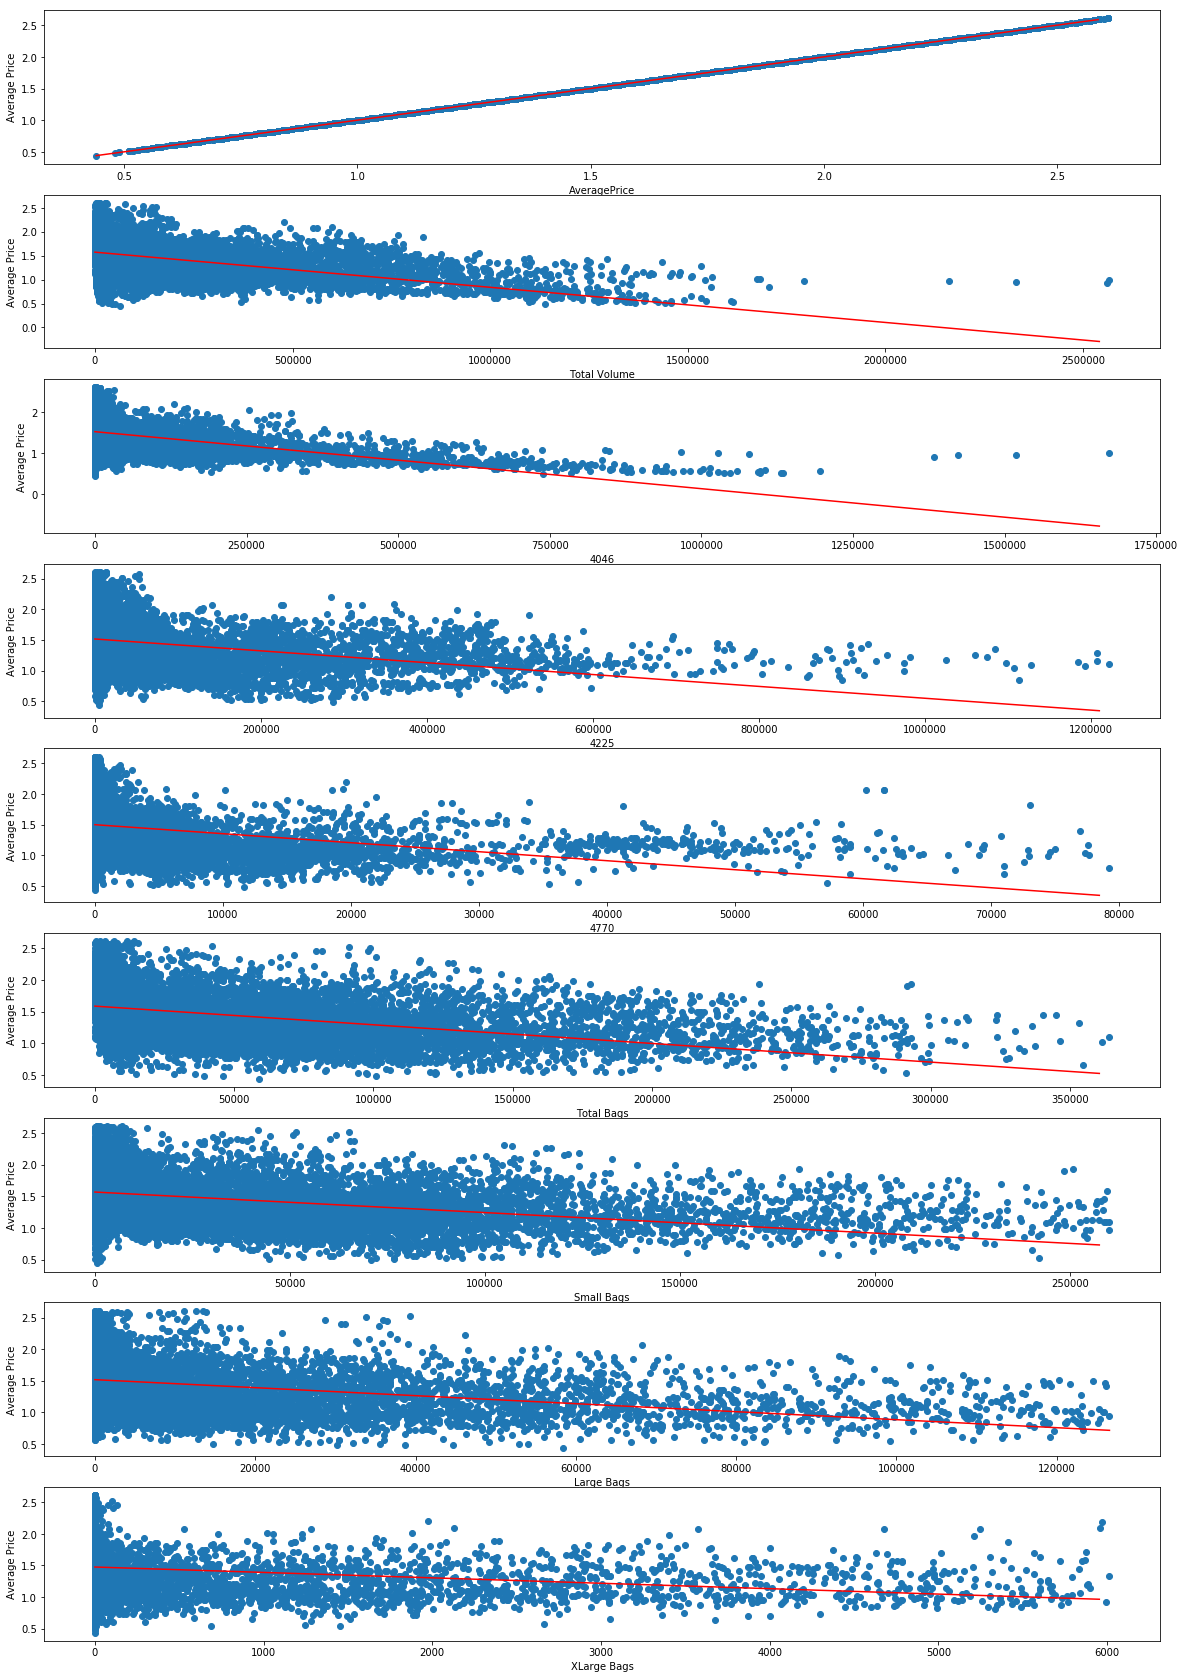

In [59]:
# Build models for each of the numerical data paired with AveragePrice

y = avocado_data['AveragePrice']
model = LinearRegression(y)

plt.rcParams["figure.figsize"] = (20,30)

print("var", "m", "b")
for idx, i in enumerate(numerical_data):
    x = avocado_data[i]
    model.fit(x)
    print(i, model.m, model.b)
    
    vec = np.arange(min(x), max(x), np.ptp(x) / 100)
    regression = model.predict(vec)
    
    plt.subplot(len(numerical_data), 1, idx+1)
    plt.scatter(x, y)
    plt.plot(vec, regression, color='red')
    plt.ylabel('Average Price')
    plt.xlabel(i)
    plt.plot()
    
plt.rcParams["figure.figsize"] = (10,10)

Going by the difference in coefficients: "Total Volume", "4225", and the various bag sizes most affect the "AveragePrice" variable. The other coefficients are much closer to 0 which imply less of a correlation between variables. It can be concluded that the greater the volume of order / the greater the "4225" variable / the larger the bag of order, the less the price of a bag is.

As for what the 4225 variable means, the only thing I managed to find was "#4225" is the product lookup code for a type of avocado: https://loveonetoday.com/how-to/identify-hass-avocados/

Please note, the analysis is relatively simple. A few more steps I would complete next would be:

- Look into comparing years of avocado prices and relating this to possible weather events or the avocado industry
- Build a more complex linear regression class that can handle multiple variables
- Tying in outside data sources included those mentioned in the first point